# LAB 3

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from mayavi import mlab
from pdffuns import norm2D, plot_3d, plot_regions, parzen, knn
from matplotlib import pyplot as plt
from matplotlib import cm

In [3]:
mlab.init_notebook('x3d', 970, 600)
plt.rcParams['figure.figsize'] = (14, 14)

Notebook initialized with x3d backend.


Load the data samples from a file.

In [4]:
samples_1, samples_2 = np.load('lab3.p', allow_pickle=True)

Estimate $\mu$ and $\Sigma$ for each class.

In [5]:
mu_1 = samples_1.mean(axis=1).reshape(-1, 1)
mu_2 = samples_2.mean(axis=1).reshape(-1, 1)

sigma_1 = np.cov(samples_1)
sigma_2 = np.cov(samples_2)

In [6]:
dist_1 = norm2D(mu_1, sigma_1)
dist_2 = norm2D(mu_2, sigma_2)

In [7]:
plot_3d(dist_1[2], dist_2[2], 'wpdf.png')

![](wpdf.png)

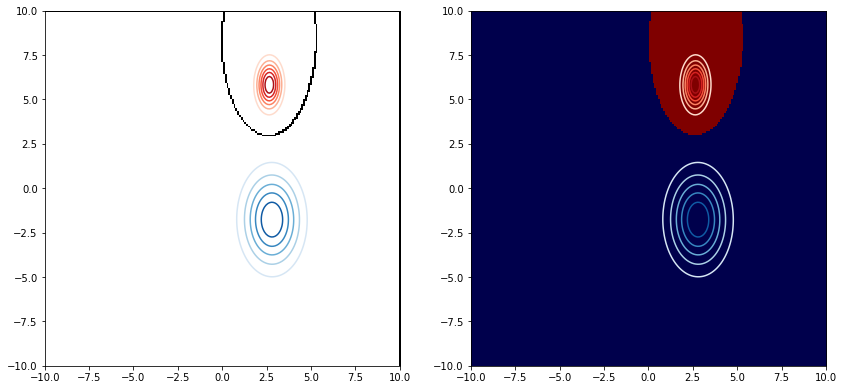

In [8]:
plot_regions(dist_1, dist_2)

## Parzen classifier

In [9]:
dist1_parzen = parzen(samples_1.T, h1=0.5)
dist2_parzen = parzen(samples_2.T, h1=0.5)
plot_3d(dist1_parzen[2], dist2_parzen[2], 'parzen_3d_half.png')

![](parzen_3d_half.png)

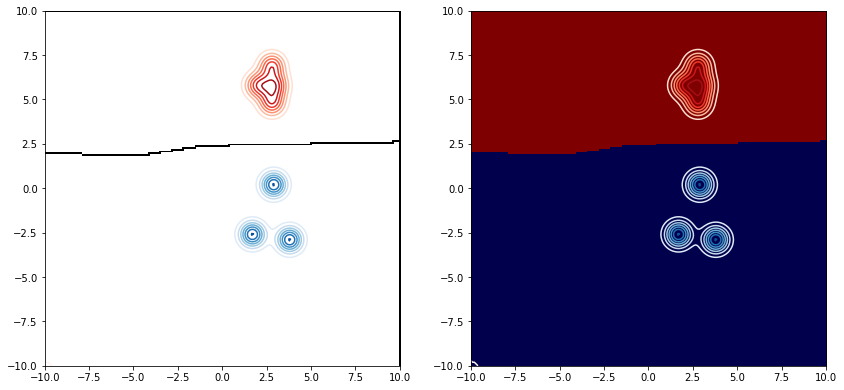

In [10]:
plot_regions(dist1_parzen, dist2_parzen)

In [11]:
dist1_parzen = parzen(samples_1.T, h1=5)
dist2_parzen = parzen(samples_2.T, h1=5)
plot_3d(dist1_parzen[2], dist2_parzen[2], 'parzen_3d_5.png', scale=1e4)

![](parzen_3d_5.png)

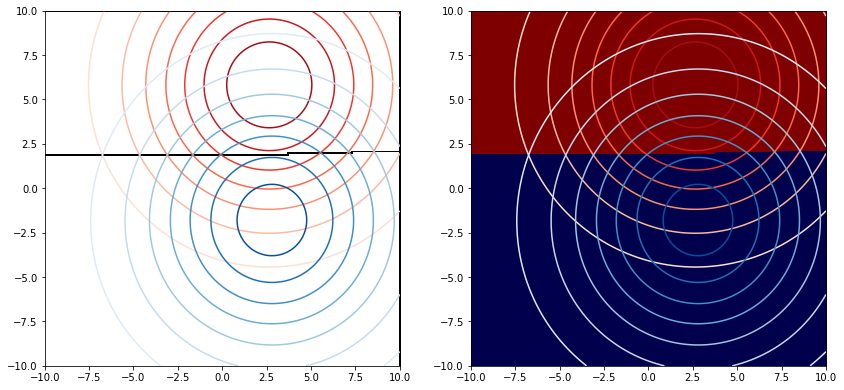

In [12]:
plot_regions(dist1_parzen, dist2_parzen)

## k-nearest neighbors

In [47]:
knn_regions = knn(samples_1.T, samples_2.T, 1)

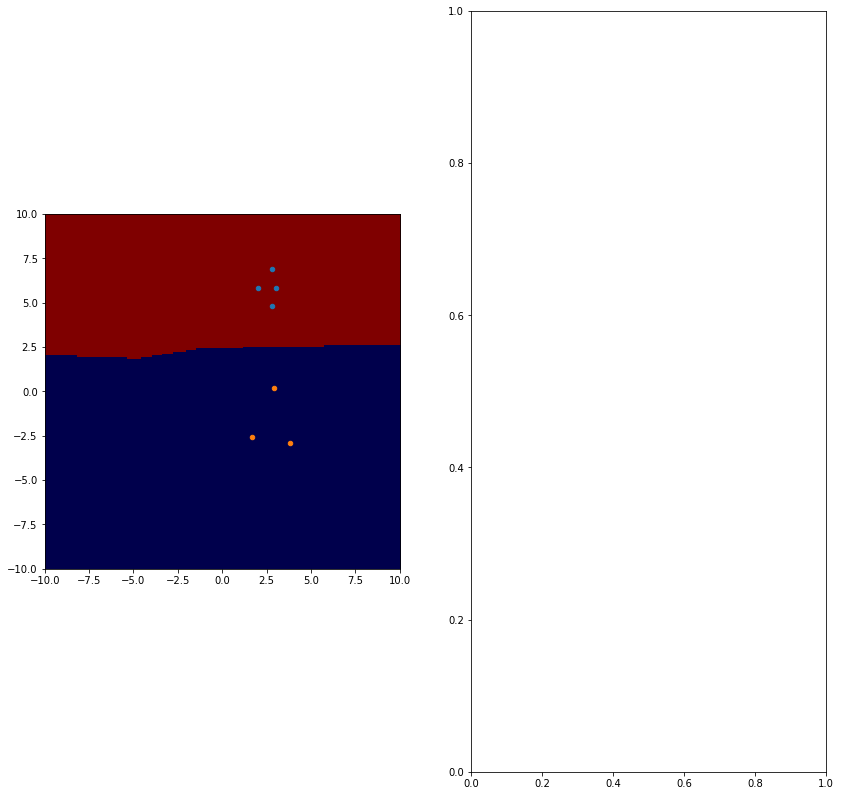

In [48]:
#plot_regions(knn_regions)
fig, ax = plt.subplots(1, 2)
ax[0].scatter(*samples_1, s=20)
ax[0].scatter(*samples_2, s=20)
ax[0].imshow(knn_regions[2].T, cmap=cm.seismic, extent=[-10, 10, -10, 10], origin='lower')

In [41]:
print(*samples_1)

[2.8 2.  2.8 3. ] [4.8 5.8 6.9 5.8]
